# Evaluation Metrics - Regression

### 1. Loading the Data

In [11]:
# Importing the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

### 2. Data Preparation

In [4]:
target = df['Scores']
data = df[['Hours']]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17, 1) (17,)
(8, 1) (8,)


### 3. Training the Model

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
print('y intercept: ',regressor.intercept_)
print('slope: ',regressor.coef_)

y intercept:  2.370815382341881
slope:  [9.78856669]


### 4. Residual Analysis on Training Data

1. Distribution of the Residuals - Distribution should be normal (Gaussian) with Zero Mean.
2. IID - Check for patterns in Residuals - There should exist no pattern
3. Homoscedasticity - The variance of residual is the same for any value of X

In [9]:
y_train_pred = regressor.predict(X_train)

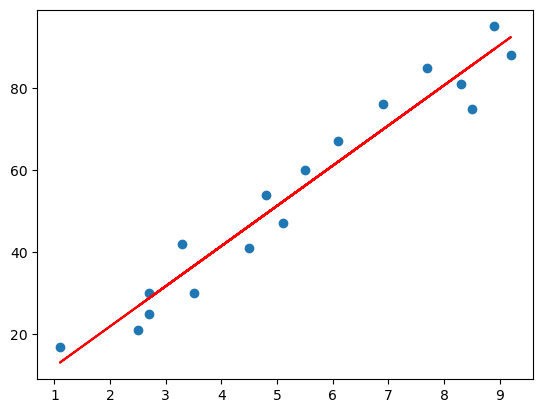

In [12]:
plt.scatter(X_train['Hours'], y_train)

plt.plot(X_train['Hours'], y_train_pred, 'r')

plt.show()

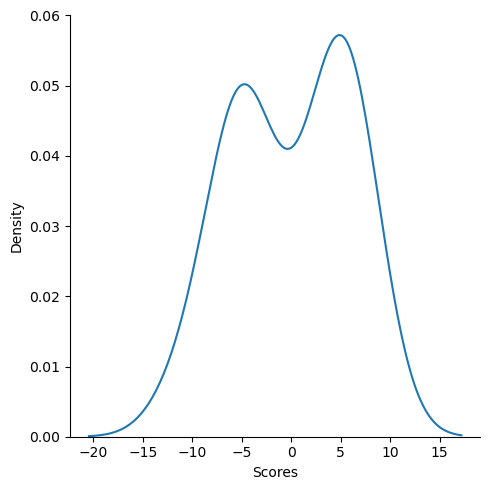

In [13]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde')

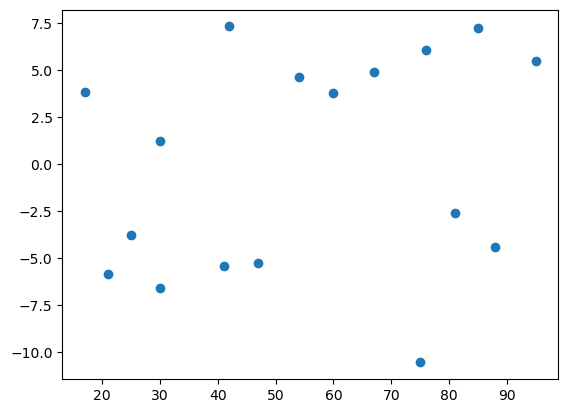

In [14]:
plt.scatter(y_train, residual)

plt.show()

<AxesSubplot:xlabel='Scores', ylabel='Count'>

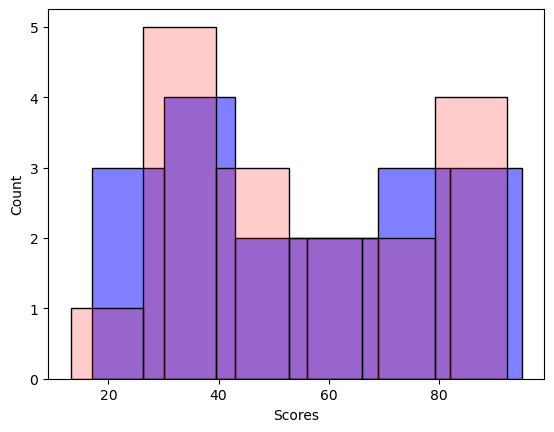

In [22]:
sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.2)

### 5. Making the Prediction

In [15]:
y_test_pred = regressor.predict(X_test)

In [16]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


<AxesSubplot:xlabel='Scores', ylabel='Count'>

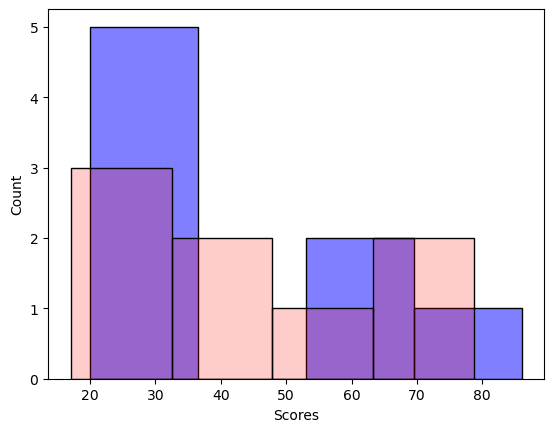

In [24]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.2)

### 6. Evaluating the Model

In [17]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.419727808027652
Mean Squared Error:  22.96509721270043
Root Mean Squared Error:  4.792191274636315


In [18]:
metrics.median_absolute_error(y_test, y_test_pred)

3.8625683463868796

In [25]:
# R^2

print(metrics.r2_score(y_test, y_test_pred))

0.9568211104435257


In [20]:
# Adjusted R^2

r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9496246288507799
